In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("playstore.csv")

In [4]:
df.shape

(10841, 13)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df["Category"].nunique()

34

In [7]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [9]:
def convert_reviews(count):
    if count[-1]=="M":
        return float(count[:len(count)-1])*1000000
    if count[-1]=="B":
        return float(count[:len(count)-1])*1000000000
    return float(count)

In [10]:
df["Reviews"] = df["Reviews"].apply(convert_reviews)

In [11]:
df=df[df["Reviews"]>0]

In [12]:
df = df[df["Installs"]!="Free"]

In [13]:
def convert_installs(value):
    if value[-1]=="+":
        value = value[:-1]
    value = value.replace(",","")
    return int(value)

In [14]:
df["Installs"] = df["Installs"].apply(convert_installs)

In [15]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
df.shape

(10244, 13)

In [17]:
df.drop_duplicates(subset = {"App"}, inplace = True)

In [18]:
df.shape

(9066, 13)

In [19]:
tops = df[df["Reviews"]>10000000].sort_values("Installs", ascending = False).sort_values("Reviews", ascending = False)[["App", "Category"]].head(15)

In [20]:
tops = tops.set_index("App")

## Top 15 most popular apps on Play Store (by number of user ratings)

In [21]:
tops

,Category
App,
Facebook,SOCIAL
WhatsApp Messenger,COMMUNICATION
Instagram,SOCIAL
Messenger – Text and Video Chat for Free,COMMUNICATION
Clash of Clans,GAME
Clean Master- Space Cleaner & Antivirus,TOOLS
Subway Surfers,GAME
YouTube,VIDEO_PLAYERS
"Security Master - Antivirus, VPN, AppLock, Booster",TOOLS


In [31]:
df.shape

(9066, 13)

In [58]:
tops = df[df["Installs"]>=1000000000].sort_values("Installs", ascending = False).sort_values("Reviews", ascending = False)[["App", "Category"]].head(15)

In [59]:
tops = tops.set_index("App")

## Top 15 most downloaded apps on playstore 

In [60]:
tops

,Category
App,
Facebook,SOCIAL
WhatsApp Messenger,COMMUNICATION
Instagram,SOCIAL
Messenger – Text and Video Chat for Free,COMMUNICATION
Subway Surfers,GAME
YouTube,VIDEO_PLAYERS
Google Photos,PHOTOGRAPHY
Skype - free IM & video calls,COMMUNICATION
Google Chrome: Fast & Secure,COMMUNICATION


## Note that most of the above applications are either from Google or from Facebook. And  these applications,(like Maps, chrome,youtube,etc) come pre-installed in all the android devices. So, though users donot intall these apps by themselves,still they show very high number of downloads on playstore.

In [23]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [19]:
games = df[df["Category"]=="GAME"]

In [20]:
games=games[games["Installs"]>=100000000]

In [21]:
games=games[games["Rating"]>=4.0]

In [22]:
games = games.sort_values("Installs", ascending = False)

In [23]:
tops = games[["App","Rating","Genres"]]

## Top 15 most downloaded games from playstore. 

In [24]:
tops = tops.set_index("App")
tops.head(15)

,Rating,Genres
App,,
Subway Surfers,4.5,Arcade
My Talking Tom,4.5,Casual
Candy Crush Saga,4.4,Casual
Temple Run 2,4.3,Action
Pou,4.3,Casual
Yes day,4.5,Casual
Jetpack Joyride,4.4,Arcade
Bus Rush: Subway Edition,4.1,Action
Agar.io,4.2,Action


## Subway surfers is the most downloaded android game on playstore with over 1B downloads. We also see that people like action and casual games a lot. 

In [33]:
paid = df[df["Type"]!="Free"]

In [36]:
def correct_price(price):
    if price[0]=="$":
        return float(price[1:])
    else:
        return float(price)

In [37]:
paid["Price"] = paid["Price"].apply(correct_price)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
paid.rename(columns={"Price":"Price (in $)"}, inplace =True)

C:\Users\Sritiman Adak\python\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## These are the most expensive applications on playstore. 

In [48]:
paid.sort_values("Price (in $)", ascending =False)[["App", "Price (in $)"]].set_index("App").head(15)

,Price (in $)
App,
I'm Rich - Trump Edition,400.00
I am rich,399.99
I Am Rich Pro,399.99
I Am Rich Premium,399.99
I am rich(premium),399.99
most expensive app (H),399.99
I am Rich Plus,399.99
I am Rich!,399.99
I am rich (Most expensive app),399.99


## Top 10 most downloaded paid apps on playstore. 

In [55]:
paid.sort_values("Installs", ascending = False)[["App","Rating", "Price (in $)"]].set_index("App").head(10)

,Rating,Price (in $)
App,,
Hitman Sniper,4.6,0.99
Minecraft,4.5,6.99
Bloons TD 5,4.6,2.99
Card Wars - Adventure Time,4.3,2.99
True Skate,4.4,1.99
Sleep as Android Unlock,4.5,5.99
Stickman Legends: Shadow Wars,4.4,0.99
League of Stickman 2018- Ninja Arena PVP(Dreamsky),4.4,0.99
Lost Journey (Dreamsky),4.5,0.99


### Note that most of the apps are games. 

In [58]:
dating = df[df["Category"] == "DATING"]

In [59]:
dating.shape

(152, 13)

## Top 10 most popular dating apps on playstore. 

In [63]:
dating.sort_values("Installs", ascending = False).head(20).sort_values("Reviews", ascending = False)[["App", "Rating"]].set_index("App").head(10)

,Rating
App,
Zoosk Dating App: Meet Singles,4.0
"Moco - Chat, Meet People",4.2
Hot or Not - Find someone right now,4.1
OkCupid Dating,4.1
Hitwe - meet people and chat,4.2
Find Real Love — YouLove Premium Dating,4.5
"iPair-Meet, Chat, Dating",4.5
Free Dating App & Flirt Chat - Match with Singles,4.4
"Chat Rooms, Avatars, Date - Galaxy",4.3


In [71]:
%matplotlib notebook
plt.style.use("ggplot")

<IPython.core.display.Javascript object>


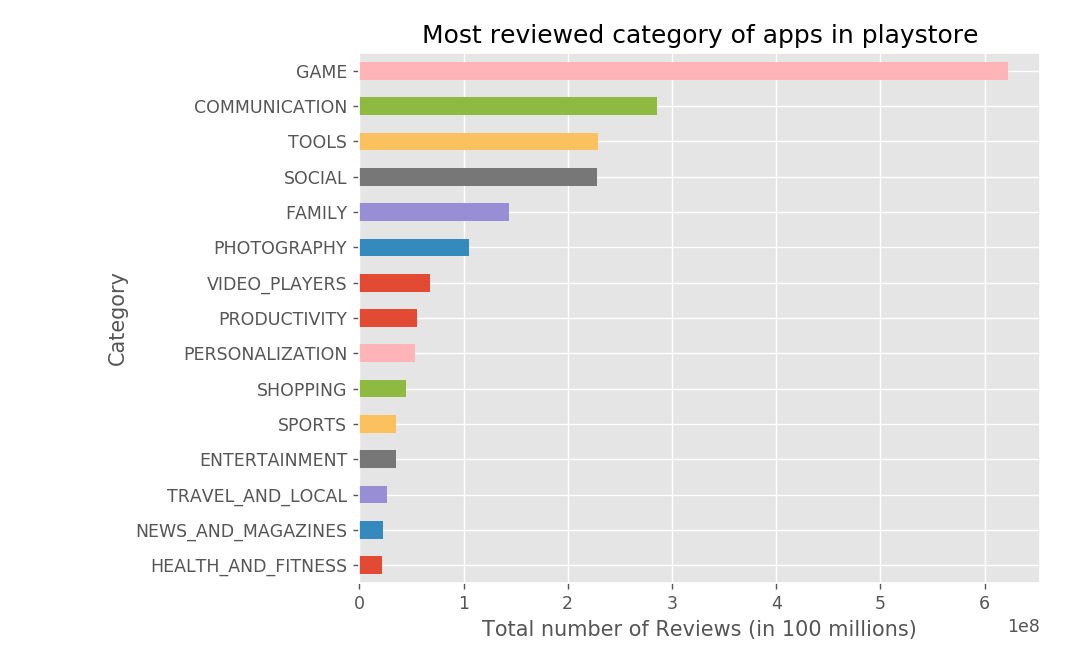

In [99]:
df.groupby("Category").sum().sort_values("Reviews", ascending = True).tail(15)["Reviews"].plot(kind = "barh")
plt.title("Most reviewed category of apps in playstore")
plt.ylabel("Category")
plt.xlabel("Total number of Reviews (in 100 millions)")
plt.tight_layout()
plt.show()

## Considering the total number of reviews given to apps in playstore, we see that Game category is the most popular category of apps on play store, followed by communication and tools 

<IPython.core.display.Javascript object>


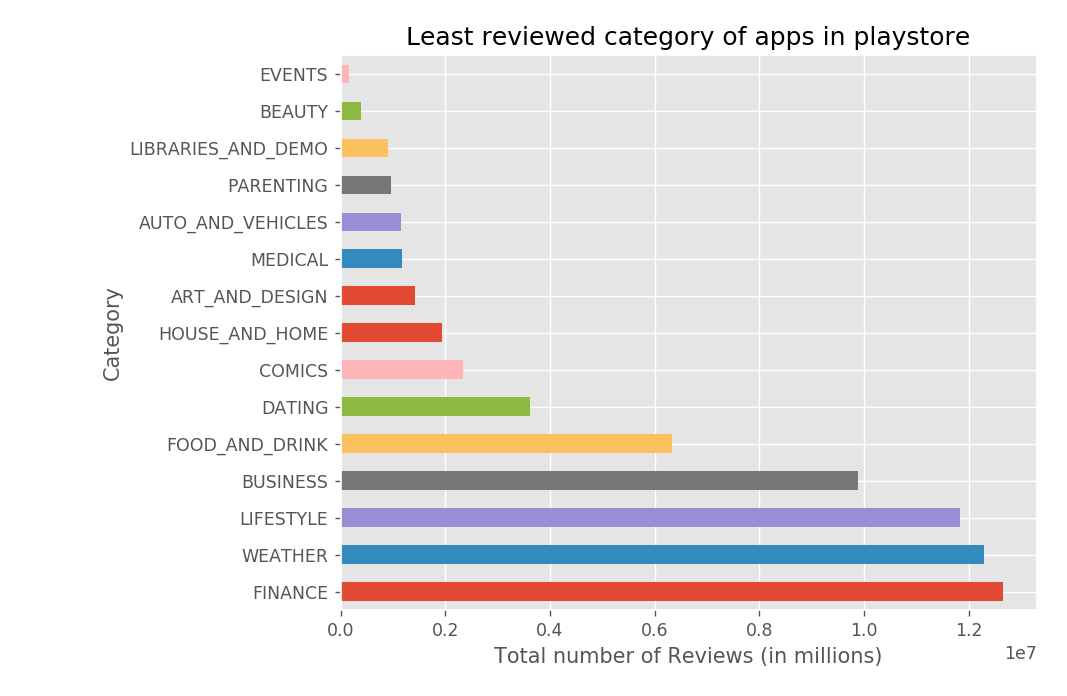

In [100]:
df.groupby("Category").sum().sort_values("Reviews", ascending = False).tail(15)["Reviews"].plot(kind = "barh")
plt.title("Least reviewed category of apps in playstore")
plt.ylabel("Category")
plt.xlabel("Total number of Reviews (in millions)")
plt.tight_layout()
plt.show()

## These are the least reviewed category of apps on playstore 

In [119]:
top_rated = df[df["Reviews"]>=3500000].sort_values("Rating", ascending = False).head(15)["App"].values

## These are the top rated apps:-

In [122]:
for i in range(15):
    print(top_rated[i])

Period Tracker - Period Calendar Ovulation Tracker
Security Master - Antivirus, VPN, AppLock, Booster
Piano Tiles 2™
Clean Master- Space Cleaner & Antivirus
Duolingo: Learn Languages Free
Mercado Libre: Find your favorite brands
ES File Explorer File Manager
SHAREit - Transfer & Share
Castle Clash: Heroes of the Empire US
CM Launcher 3D - Theme, Wallpapers, Efficient
ZEDGE™ Ringtones & Wallpapers
Clash of Clans
Gardenscapes
PhotoGrid: Video & Pic Collage Maker, Photo Editor
Waze - GPS, Maps, Traffic Alerts & Live Navigation
